Enter the times of eclipse you have measured with their cycle numbers (in the first column) here. 

In [1]:
# Example values for TIC 278826996
my_eclipse_times = """
1 1468.405 
2 1487.571
3 1506.740
"""


In [14]:
import numpy as np
from io import StringIO
data = np.loadtxt(StringIO(my_eclipse_times))
cycle = data[:,0]
eclipse_time = data[:,1]
c = np.polyfit(cycle,eclipse_time,1)
print('Eclipses at times {:0.3f} + {:0.4f} x Cycle'.format(c[1],c[0]))

Eclipses at times 1449.237 + 19.1675 x Cycle


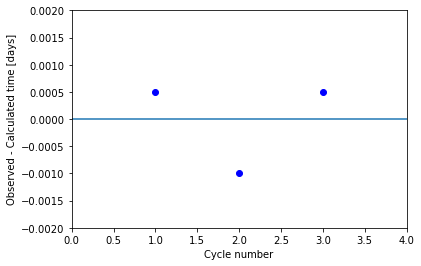

In [24]:
import matplotlib.pyplot as p
offset = eclipse_time - np.polyval(c,cycle)
p.plot(cycle,offset,'bo')
p.plot([cycle.min()-1,cycle.max()+1],[0,0])
p.xlim([cycle.min()-1,cycle.max()+1])
p.ylim(-max(abs(offset))-0.001,max(abs(offset))+0.001)
p.xlabel('Cycle number')
p.ylabel('Observed - Calculated time [days]')
p.show()